# Welcome to the RedCap API Workshop
---

# Workshop Outline
---
By the end of this workshop we hope that you will learn what the RedCap API is, and how you can use it for your project.

During this workshop we will cover the following topics:
 1. [What is an API?](#what-is-an-api)
 2. [What is a RESTful API?](#what-is-a-restful-api)
    - GET
    - PUT
    - POST
    - DELETE
    - HTTP Status Codes
 3. [RedCap API Playground](#redcap-api-playground)
    - Getting access to the API Playground
    - Using the API Playgroud
    - JSON and CSV support 
 4. [Using Python with the API](#using-the-redcap-api-with-python)
    - Options for connecting to the API
    - Ex. Project Info
    - Ex. Arms/Events
    - Ex. Export Records
    - Ex. Import Records
    - Ex. Surveys
 5. [Data Analysis and Visualization](#data-analysis-and-visualization)
    - Ex. Using pandas package
    - Ex. Using matplotlib for visualization
    


# <a name="what-is-an-api"></a>I. What is an API
---
**Application Programing Interfaces** (**API**) are a set of functions used to communicate with an application or service. A good analogy I once heard is to think of an API as a menu at a restaurant. If you want to order food from the restaurant, you can read descriptions of each dish form the list of menu items then ask the restaurant staff to serve you that item. It's really not that important *how* the dish was made or served to you. As long as you have a good idea of what to expect from your order. This analogy isn't perfect since you typically can't give ingredients to your server for them to make you a dish, but with API's you can!

In computer parlance, API's define a set of functions that allow you to get data from an application or send data to an application. Most large applications &ndash;including web application&ndash; have API's to which you can communicate. This gives developers a way to interact with an application which can be incredibly useful in many situations.

For example, a researcher studying depression might want to analyze comments on Instagram to see if they can find speech patterns associated with depression. To do this they want to use a machine learning model which needs a huge dataset to train.

From a technical perspective, the first step would be to gather the data to train the model. You could do this by having an RA go and physically copy all the comments by hand, but this would be insanely time consuming and teadious to the point where it wouldn't be worth it. That's where the Instagram API can help. Instead of having your RA copy and paste thousands or millions of comments, they could write a script to scroll through comments and copy them to an excel sheet in an automated way.

To write this script, they would need to use the Instagram API to communicate with the Instagram web application and pull the necessary data. The Instagram API would describe an **endpoint** (typically a URI associated with a resource) that the researcher could use in their script to get a list of comments.

###### Still a bit confused?

Let's look at a ~~real~~ fake example.

Go to the website [petstore.swagger.io](https://petstore.swagger.io/#/).

Here, they have an example API for a fake pet company that has a database of pets. See the table below.

|ID| Name| PhotoUrls|Tags|Status|..|
|---|---|---|---|---|---|
|1|Eagle|https ://...|bird|available|..|
|2|Bunny|https ://...|rodent|unavailable|..|

What if we wanted to find a list of animals available at the pet store? 

Well, luckily, the company has created an API to allow us to retreive this information without getting access to other protected information in the database. The company can control to what data we, as users, have access. They give us a *menu* through which we can *order* data.

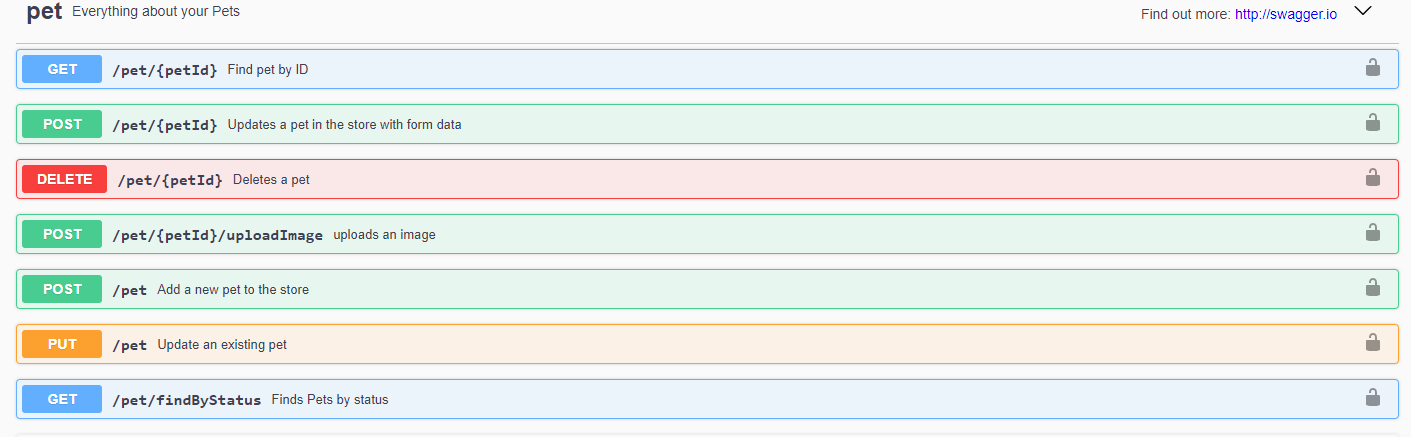

Not only can we *order* data, but through the API we also have the ability to create, update or delete data in the database. How neat is that!

![Alt Text](https://i.imgur.com/eNUYEQT.gif?noredirect)

Hopefully by now you have some idea of what an API *is*.
<br>
In the next section we'll look into some more API specifics.

In [ ]:
import requests

r = requests.get('https://petstore.swagger.io/v2/pet/2')
r.json()


---
<br>
<br>
<br>

# <a name="what-is-a-restful-api"></a>II. What is a RESTful API
---
Now that you're starting to form an intuitive sense of what an API *is*, we can start to look at the structure of API's and the standards used by the Web community.

There are many web API types, each define their own rules and best practices for interfacing with web services or applications. For example, those that adhere to [**Simple Object Access Protocol**](https://en.wikipedia.org/wiki/SOAP) (SOAP), or [**Remote Procedure Call**](https://en.wikipedia.org/wiki/Remote_procedure_call) (RPC) architectures are common, however we will focus on the most common API architecture called [**REpresentational State Transfer**](https://en.wikipedia.org/wiki/Representational_state_transfer).

#### RESTful API's
Web services that adhere to REST architecture are deemed RESTful. While REST is an architectural style rather than an actual protocol like SOAP, it makes use of a bunch of common internet standards like HTTP, URI and JSON. The nitty-gritty details of REST definitely aren't required knowledge for anyone looking to use a RESTful API but it's helpfull to know a little bit about how the architecture interfaces users with services.

HTTP based RESTful API's &ndash;like that used by redcap&ndash; are characterized by:
 - A base url
 - Standard HTTP CRUD methods
 
From the example used in the first section, we could make a request through the API by putting together the base url https://petstore.swagger.io/v2/pets/ with the HTTP standard method **GET** to retrieve the data about the collection of pets. Typically, the base url will be comprised of the main url + a version identifier + path/to/an/endpoint as in the example.

#### So what are the HTTP standard CRUD methods?

**CRUD** stands for **Create, Read, Update, and Delete**. This defines the four actions that an agent can request from the web service. Each action has accompanying *methods* that can be called upon to perform these requests. They're summarized below.

##### Create
<div align='center'>
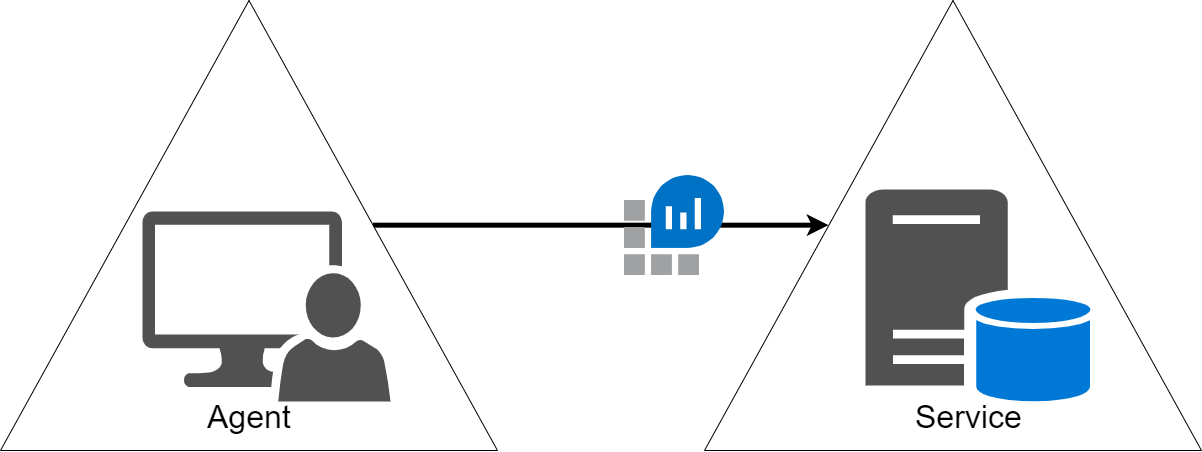
    <em>The CREATE method POSTs a new resource to the web service.</em>
</div>

The **POST** method allows agents (ie. You) to *create* member resources. From the example above, we could have submitted a **POST** request to the web service to *create* a dog (member) in the pets (collection) database. The web service would take care of most of the work that needs to be done to actually create the member in the database &ndash;like assign a unique ID&ndash; we simply have to know the correct API call to request it. Think back to the restaurant menu metaphor. Ring a bell?

##### Read
<div align='center'>
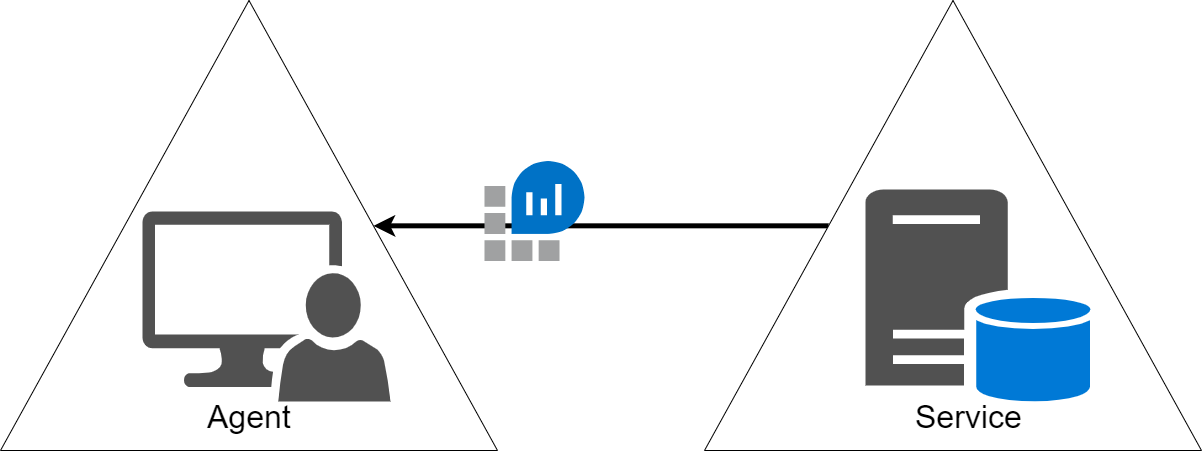
    <em>The READ method GETs a resource from the web service.</em>
</div>

The **GET** method allows the agent to pull data from the web service &ndash;in other words&ndash; *Read*. In the above example we *read* data from a collection of pets, but we could have also *read* data about the users or the state of the service, etc. In essence, GET requests stipulate a resource payload is flowing from a service to the requesting agent.

![Alt Text](https://media.giphy.com/media/YKLBb9U2Q03Ty/giphy.gif)

##### Update
<div align='center'>
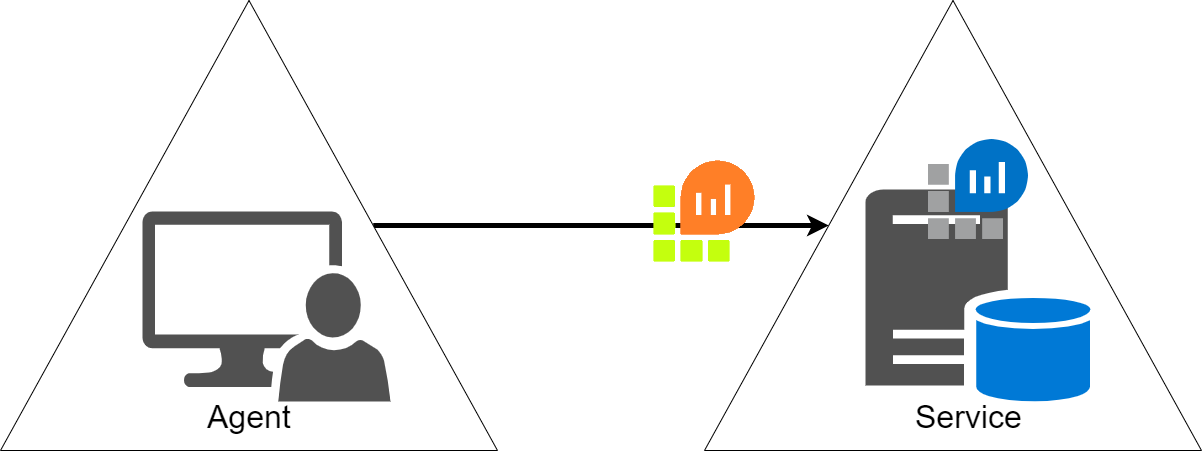
    <em>The UPDATE method comes in 2 flavours, PUT and PATCH. PUT updates the entire resource, PATCH can update only parts of the resource.</em>
</div>

The **PUT** and **PATCH** methods are both used to *update* a resource via a web service. The more common PUT method is actually used to *replace* the specified resource/s, or create one if it doesn't already exist. The PATCH method differs subtly in that it *updates* the specified resource/s, or it *may* create one if it doesn't exist. If you're resource is a file for example, a PUT would replace the file with a new version, while a PATCH might only modify some part of it.

##### Delete
<div align='center'>
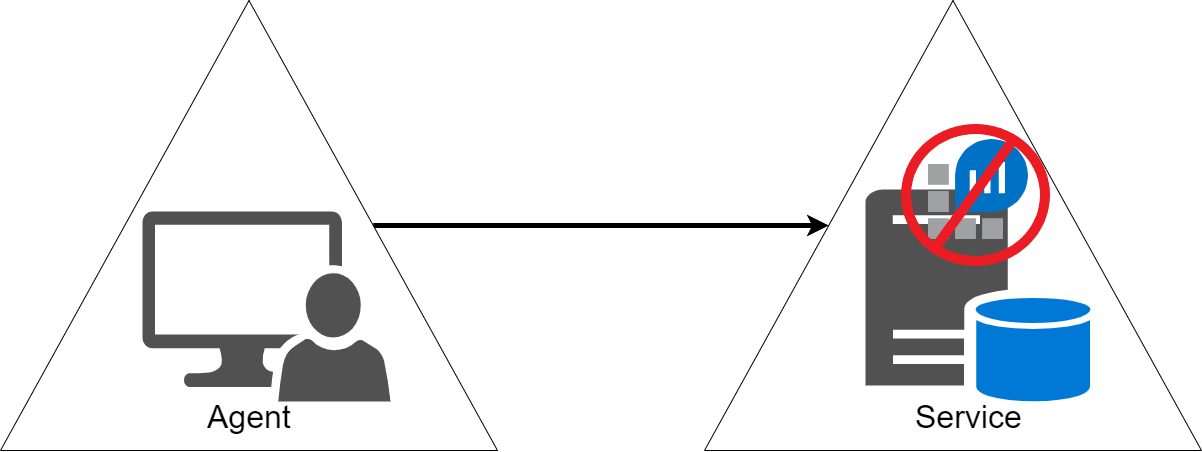
<em>The DELETE method removes a resource from the web application.</em>
</div>

Let's not overthink this, it doesn't take rocket appliances to figure out what the **Delete** method does. You can use the delete method to delete resources on from the web application. In practice, most databases will not actually delete the specified resource, but instead mark the resource as *deleted* so that it appears deleted to the user.

Ok, we're almost done. We now know what a RESTful API is, and a little about the methods they use. The last thing we'll cover before we move to the RedCap API is HTTP responses.

##### HTTP Responses
Every time you send a request to a RESTful web service you'll receive a response &ndash;whether or not your request was succesful. For example, I'm sure we're all familiar with the infamous *404 Server Not Found* response, but how about the status code *504 Gateway Timeout*?

<div align='center'>
    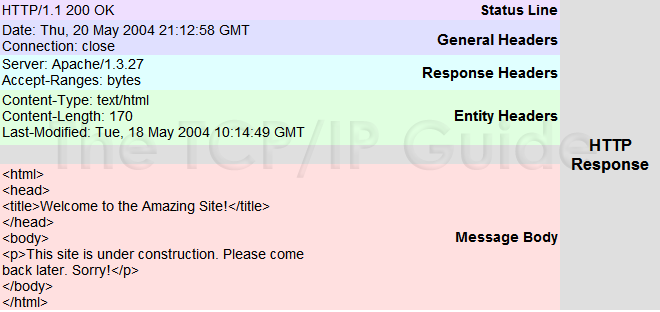
    <em>An example of a response from a web service. Notice the three main parts: status code, header and body.</em>
</div>


HTTP responses have three main parts: a status code, a header, and a body. The header will contain meta-data usually describing what to expect from the body, like the content-type (ex. html) or the date. The body (also called content) will contain the actual resouce that was requested, like a web page or database entry. Finally, at the head of the response will be the **status code**.

The status code quickly and concisely informs the requester if the request was either good or bad and what generally caused the status. Any status in the 200's is considered a success. Anything else, is a fail. Each specific code tells you a bit about why the response is what it is. Take for example status code *404*, it's painfully obvious that this status indicates a failure, but if you know a bit about HTTP status codes it would also tell you a bit about why it failed. In this case, you know it's not a problem with the web service or else the error would be in the 500's. Instead it is a problem with the requester (client), specifically, the resource you want cannot be found.

Broadly, status codes in the 100's are informational, 300's are reserved for redirects, in the 400's are client errors (something wrong from the requester's side), and 500's are reserved for server side errors. To help wrap your head around these codes, a human readable summary of the status code categories are listed in the image below.

<div align='center'>
    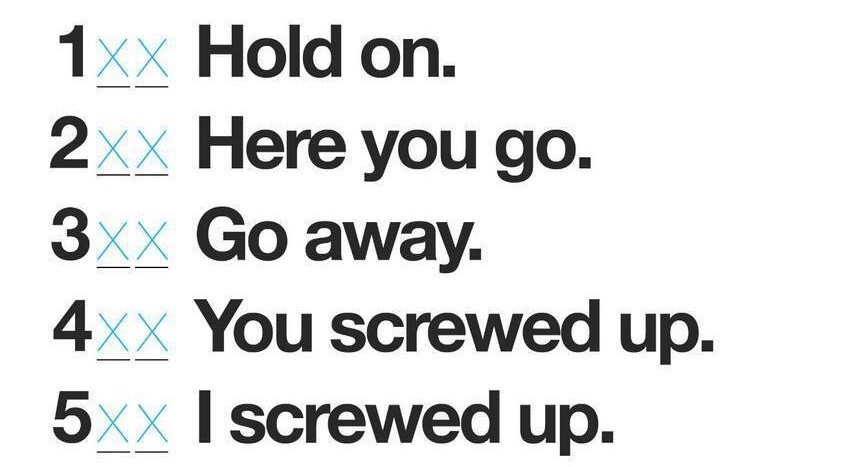
    <em>Summary of the HTTP status codes, in plain english</em>
</div>

Finally, if this section seemed pretty neat to you, check out this [tutorial website](https://www.restapitutorial.com/) that can give some more details and best practices for creating a RESTful API and a list of explanations for each status code.


---
<br>
<br>
<br>

# <a name="redcap-api-playground"></a>III. RedCap API Playground
---
Like many other tools, REDCap provides an API that allows you to retrieve or modify data or settings within REDCap. An example use case would be performing automated data imports/exports.

The easiest way to get familiar with the capabilities of the REDCap API is through API Playground - a feature that allows you to explore the REDCap API without writing any code. 

To gain access to this feature, your user rights need to include API privileges. This can be enabled by the project owner.

![user-rights](img/user-rights.png)

Next, you will see the two API buttons in your project panel. 

![api-playground](img/api-playground.png)

Finally, you can navigate to API Playgrond and click "Request API token", which is approved by the REDCap Administrator.

![request-token](img/request-token.png)


---
For this workshop, we have a demo user with full API privileges. Let's all log into REDCap and take a look at the API Playground.

**URL:** https://edc.camhx.ca/redcap/

**Login:** redcap_api_demo

**Password:** KCNIWorkshop1

---
There are a few key elements on the API Playground page, let's go over them:

**API Method**
- This dropdown allows you to select the method/content that you want to work with. 
- Examples include Arms, Events, Fields, Instruments, Records, Surveys, and more. Refer to full API documentation for details.
- Allows you to pass parameters to narrow down the information in the response. 

REDCap provides all content on one endpoint https://edc.camhx.ca/redcap/api/. Therefore, selecting the content type and passing it in the request parameters is necessary.

**Raw Request Parameters**
- This section will be automatically generated when you select the appropriate API Method and parameters. It includes the same information in plain text format and can be used in any tool or programming language that allows making API requests.
- Majority of REDCap requests are `POST` requests. Even when we want to get data, we have to pass parameters to narrow down the results. We also have to include the token and the content type (method) in the request.

**Response & Execute Request**
- This section allows you to send a request with the parameters selected above and preview a response. It is a great feature to test your API calls before you put them into your application.


**Code Snippets**
- API Playground provides automatically generated code snippets in various languages. 
- You can build your API calls without writing any code and copy the resulting snippets into your application.

REDCap API methods can provide and accept data in either JSON or CSV. XML is also supported, but used less commonly.

---
<br>
<br>
<br>

# <a name="using-the-redcap-api-with-python"></a>IV. Using RedCap API with Python
---

#### Choosing the language and library

Most popular programming languages have one or more libraries that allow you to make API calls. Some of them even have libraries to specifically work with REDCap. You can find more information here: http://redcap-tools.github.io/projects/

For this tutorial we will be using **Python 3.7** with the `requests` library. This library is not REDCap-specific and can work with any arbitrary API.

#### (Optional) Set up your environment
In this tutorial, the Python environment is already created for you with all packages installed. However, if you're working in another python environment then it will be necessary to install the `requests` library for that environment. Here we give an example using Anaconda.

From the terminal (Linux & MacOS) or Anaconda prompt (Windows):
```shell
# First create your conda environment - replace redcap-env with your preferred environment name
conda create --name redcap-env python=3.7

# Activate the environment you just created
conda activate redcap-env

# Install the requests package to your environment
conda install requests
```

### 1. Export Project Info

We are going to make our first API call with our Python code. This will return the project info.

Have a look at the code below:

In [ ]:
import requests

In [ ]:
redcap_url = 'https://edc.camhx.ca/redcap/api/'

In [ ]:
data = {
    'token': '19DC2E5DEC4794D7BEA5932BAB8D7B16',
    'content': 'project',
    'format': 'json',
    'returnFormat': 'json'
}

In [ ]:
r = requests.post(redcap_url, data=data)

First, we import the `requests` library. 

Then, we specify the REDCap API endpoint (URL). 

Next, we specify our parameters in a Python dictionary. This can be copied from the API Playground. Note the content parameter. 

Finally, we make our `POST` request. It returns some JSON-formatted data, which is saved into variable `r`. 

Now, we can do something with the data that we got back. For example, print everything that was returned as a JSON string, or convert it to a Python dictionary.

In [ ]:
# Prints the raw result (JSON formatted string)
r.text

In [ ]:
# Parses the raw result to convert it to a Python dictionary
r.json()

In [ ]:
r.json().get('project_title')

### 2. Export Arms and Events

In [ ]:
token = '19DC2E5DEC4794D7BEA5932BAB8D7B16'

In [ ]:
data = {
    'token': token,
    'content': 'arm',
    'format': 'json',
    'returnFormat': 'json'
}

r = requests.post(redcap_url, data=data)

r.text

In [ ]:
data = {
    'token': token,
    'content': 'event',
    'format': 'json',
    'arms[0]': '1',    # Optional
    'returnFormat': 'json'
}

r = requests.post(redcap_url, data=data)

r.json()

### 3. Export Records

In [ ]:
# Get record with id 261965, instrument "my first instrument", as csv
data = {
    'token': token,
    'content': 'record',
    'format': 'csv',
    'type': 'flat',
    'records[0]': '261965',
    'forms[0]': 'my_first_instrument',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'exportSurveyFields': 'false',
    'exportDataAccessGroups': 'false'
}

r = requests.post(redcap_url, data=data)

r.text

# If the form was completed in multiple events, it will return all instances.

In [ ]:
# Same request, minimum parameters
data = {
    'token': token,
    'content': 'record',
    'format': 'csv',
    'records[0]': '261965',
    'forms[0]': 'my_first_instrument'
}

r = requests.post(redcap_url, data=data)

r.text

In [ ]:
# Same request, json
data = {
    'token': token,
    'content': 'record',
    'format': 'json',
    'records[0]': '261965',
    'forms[0]': 'my_first_instrument',

}

r = requests.post(redcap_url, data=data)

r.text

### 4. Import Records

We will create a new record by sending some data as a JSON string. This will include the new record id, event name, and a variable to indicate that the first instrument should be complete. 

Use your name or some unique value for the record id.

In [ ]:
my_new_record = '[{"record_id": "Tester","redcap_event_name": "event_1_arm_1", "my_first_instrument_complete": "2"}]'

In [ ]:
data = {
    'token': token,
    'content': 'record',
    'format': 'json',
    'type': 'flat',
    'overwriteBehavior': 'overwrite',
    'forceAutoNumber': 'false',
    'data': my_new_record,
    'returnContent': 'count'
}
r = requests.post(redcap_url, data=data)

r.text

Now let's try to send a full assessment. So far we worked with JSON strings. This time we will use a Python dictionary to modify the values and then use `json` library to convert this to a JSON string.

In [ ]:
import json

In [ ]:
# Don't forget to change the record id
my_phq9 = [{'record_id': 'Tester',
            'redcap_event_name': 'event_1_arm_1',
            'phq9_cde_id': 'PHQ9-1.0',
            'phq9_1': '1',
            'phq9_2': '1',
            'phq9_3': '2',
            'phq9_4': '1',
            'phq9_5': '1',
            'phq9_6': '1',
            'phq9_7': '0',
            'phq9_8': '3',
            'phq9_9': '2',
            'phq9_how_difficult': '2',
            'phq9_calc': '12',
            'phq910_complete': '2'}]

In [ ]:
# Convert Python dict to JSON string, check if it looks correct
my_phq9 = json.dumps(my_phq9)
my_phq9

In [ ]:
data = {
    'token': token,
    'content': 'record',
    'format': 'json',
    'type': 'flat',
    'overwriteBehavior': 'overwrite',
    'forceAutoNumber': 'false',
    'data': my_phq9,
    'returnContent': 'count'
}
r = requests.post(redcap_url, data=data)

r.text

---
<br>
<br>
<br>

# <a name="data-analysis-and-visualization"></a>V. Data Analysis and Visualization
---


In [ ]:
import pandas as pd

In [ ]:
data = {
    'token': token,
    'content': 'record',
    'format': 'json'
}

r = requests.post(redcap_url, data=data)

r.json()

In [ ]:
df = pd.DataFrame(r.json())

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df[["phq9_calc"]] = df[["phq9_calc"]].apply(pd.to_numeric)

In [ ]:
df.dtypes

In [ ]:
df.plot(x ='record_id', y='phq9_calc', kind = 'bar')
